In [1]:
#!pip install statannot

In [34]:
#%%
# Next we want to install all packages and libraries we need for our analysis

from scipy.optimize import curve_fit
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from openpyxl import Workbook
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics import r2_score
from scipy.stats import norm
import seaborn as sns
from statannot import add_stat_annotation

In [349]:
save_path = r'C:\Users\shossein\Desktop\New folder\2020\December\07.12.2020\OveralFeatures'

In [350]:
%cd C:\Users\shossein\Desktop\New folder\2020\December\07.12.2020\OveralFeatures

C:\Users\shossein\Desktop\New folder\2020\December\07.12.2020\OveralFeatures


In [351]:
pwd

'C:\\Users\\shossein\\Desktop\\New folder\\2020\\December\\07.12.2020\\OveralFeatures'

In [243]:
EPSC_kinetics = pd.read_excel('kinetics.xlsx', sheet_name='eEPSC', skiprows = 2)

In [244]:
IPSC_kinetics = pd.read_excel('kinetics.xlsx', sheet_name='eIPSC', skiprows = 2)

C:\Users\shossein\Anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning:

Mean of empty slice.

C:\Users\shossein\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\shossein\Anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning:

invalid value encountered in true_divide



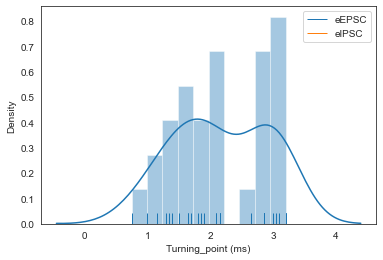

In [242]:
#%% ALL DELTAs TOHETHER
EPSC_kinetics = pd.read_excel('kinetics.xlsx', sheet_name='eEPSC', skiprows = 2)
IPSC_kinetics = pd.read_excel('kinetics.xlsx', sheet_name='eIPSC', skiprows = 2)
fig = plt.plot(figsize=(10,8))
# for a in [EPSC_kinetics['1st Delta (ms)'], EPSC_kinetics['2nd Delta (ms)'], EPSC_kinetics['3rd Delta (ms)']]:
#     ax = sns.distplot(a, ax=axes[0])
for a in [EPSC_kinetics['Turning_point (ms)'], IPSC_kinetics['Turning_point (ms)']]:
    sns.distplot(a,  rug=True, bins= 10)
plt.legend(labels=['eEPSC','eIPSC'])
plt.ylabel("Density")
plt.savefig('TurningPoint.svg')
plt.savefig('TurningPoint.pdf')

In [268]:
# s = int(input("Enter a number "))
for i in range(0, 10, 2):
    print (i)

0
2
4
6
8


C:\Users\shossein\Anaconda3\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning:

invalid value encountered in less

C:\Users\shossein\Anaconda3\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning:

invalid value encountered in greater

C:\Users\shossein\Anaconda3\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning:

invalid value encountered in less

C:\Users\shossein\Anaconda3\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning:

invalid value encountered in greater

C:\Users\shossein\Anaconda3\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning:

invalid value encountered in less

C:\Users\shossein\Anaconda3\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning:

invalid value encountered in greater

C:\Users\shossein\Anaconda3\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning:

invalid value encountered in less

C:\Users\shossein\Anaconda3\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning:

invalid va

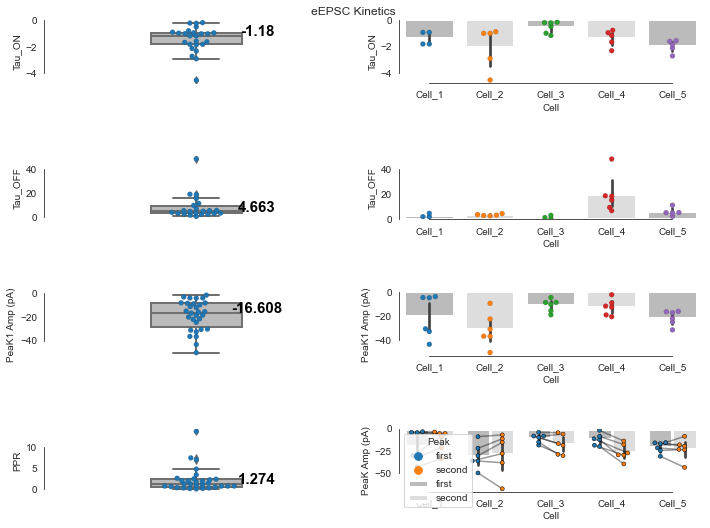

In [271]:
#%%  eEPSC kineticsTau_ON, Tau_OFF, Amplitude, PPR

f, axes = plt.subplots(4, 2, figsize=(10,8))
ax= sns.boxplot(palette=['#BBBBBB','#DDDDDD'],linewidth=2, y='Tau_ON', data= EPSC_kinetics, width=0.3, ax=axes[0,0])
medians = round(EPSC_kinetics['Tau_ON'].median(),3)
vertical_offset = EPSC_kinetics['Tau_ON'].median() * 0.5 # offset from median for display
ax.text(0.2,medians ,medians, 
horizontalalignment='center',fontsize=15,color='k',weight='semibold')

ax=sns.swarmplot(y='Tau_ON', data= EPSC_kinetics, 
                  palette=sns.color_palette(),
                  edgecolor='black',
                  linewidth=0.1,
                  ax=axes[0,0])
ax=sns.barplot(palette=['#BBBBBB','#DDDDDD'],linewidth=2, x='Cell', y='Tau_ON', data= EPSC_kinetics, ax=axes[0,1])
ax=sns.swarmplot(x='Cell', y='Tau_ON', data= EPSC_kinetics, 
                  palette=sns.color_palette(),
                  edgecolor='black',
                  linewidth=0.1,
                  ax=axes[0,1])
# ax.set(ylim=(-20, 0))





ax= sns.boxplot(palette=['#BBBBBB','#DDDDDD'],linewidth=2, y='Tau_OFF', data= EPSC_kinetics, width=0.3, ax=axes[1,0])
medians = round(EPSC_kinetics['Tau_OFF'].median(),3)
vertical_offset = EPSC_kinetics['Tau_OFF'].median() * 0.5 # offset from median for display
ax.text(0.2,medians ,medians, 
horizontalalignment='center',fontsize=15,color='k',weight='semibold')

ax=sns.swarmplot(y='Tau_OFF', data= EPSC_kinetics, 
                  palette=sns.color_palette(),
                  edgecolor='black',
                  linewidth=0.1,
                  ax=axes[1,0])
ax=sns.barplot(palette=['#BBBBBB','#DDDDDD'],linewidth=2, x='Cell', y='Tau_OFF', data= EPSC_kinetics, ax=axes[1,1])
ax=sns.swarmplot(x='Cell', y='Tau_OFF', data= EPSC_kinetics, 
                  palette=sns.color_palette(),
                  edgecolor='black',
                  linewidth=0.1,
                  ax=axes[1,1])
# ax.set(ylim=(-40, 0))





ax= sns.boxplot(palette=['#BBBBBB','#DDDDDD'],linewidth=2, y='PeaK1 Amp (pA)', data= EPSC_kinetics, width=0.3, ax=axes[2,0])
medians = round(EPSC_kinetics['PeaK1 Amp (pA)'].median(),3)
vertical_offset = EPSC_kinetics['PeaK1 Amp (pA)'].median() * 0.5 # offset from median for display
ax.text(0.2,medians ,medians, 
horizontalalignment='center',fontsize=15,color='k',weight='semibold')

ax=sns.swarmplot(y='PeaK1 Amp (pA)', data= EPSC_kinetics, 
                  palette=sns.color_palette(),
                  edgecolor='black',
                  linewidth=0.1,
                  ax=axes[2,0])
ax=sns.barplot(palette=['#BBBBBB','#DDDDDD'],linewidth=2, x='Cell', y='PeaK1 Amp (pA)',  data= EPSC_kinetics, ax=axes[2,1])
ax=sns.swarmplot(x='Cell', y='PeaK1 Amp (pA)', data= EPSC_kinetics, 
                  palette=sns.color_palette(),
                  edgecolor='black',
                  linewidth=0.1,
                  ax=axes[2,1])
# ax.set(ylim=(-40, 0))





ax= sns.boxplot(palette=['#BBBBBB','#DDDDDD'],linewidth=2, y='PPR', data= EPSC_kinetics, width=0.3, ax=axes[3,0])
medians = round(EPSC_kinetics['PPR'].median(),3)
vertical_offset = EPSC_kinetics['PPR'].median() * 0.5 # offset from median for display
ax.text(0.2,medians ,medians, 
horizontalalignment='center',fontsize=15,color='k',weight='semibold')

ax= sns.swarmplot(y='PPR', data= EPSC_kinetics, 
                  palette=sns.color_palette(),
                  edgecolor='black',
                  linewidth=0.1,
                  ax=axes[3,0])
# ax.set(ylim=(-40, 0))


ax=sns.barplot(palette=['#BBBBBB','#DDDDDD'],linewidth=3, x='Cell', y='PeaK Amp (pA)', hue='Peak', data= EPSC_kinetics, ax=axes[3,1])

ax=sns.swarmplot(x='Cell', y='PeaK Amp (pA)', hue='Peak', data= EPSC_kinetics, 
                  palette=sns.color_palette(),
                  edgecolor='black',
                  linewidth=0.5,
                  size = 4, dodge=True, ax=axes[3,1])

# Now connect the dots
# Find idx0 and idx1 by inspecting the elements return from ax.get_children()
# ... or find a way to automate it
for ii in range(0, 10, 2):
    idx0 = ii
    idx1 = ii+1
    locs1 = ax.get_children()[idx0].get_offsets()
    locs2 = ax.get_children()[idx1].get_offsets()

    for i in range(locs1.shape[0]):
        x = [locs1[i, 0], locs2[i, 0]]
        y = [locs1[i, 1], locs2[i, 1]]
        ax.plot(x, y, color='black', alpha=0.4)
# ax.set(ylim=(-40, 0))



plt.suptitle('eEPSC Kinetics')
plt.subplots_adjust(top=0.2)

f.tight_layout()
sns.despine(trim=True)

plt.savefig('EPSC_kinetics.svg')
plt.savefig('EPSC_kinetics.pdf')


C:\Users\shossein\Anaconda3\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning:

invalid value encountered in less

C:\Users\shossein\Anaconda3\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning:

invalid value encountered in greater



ValueError: min() arg is an empty sequence

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


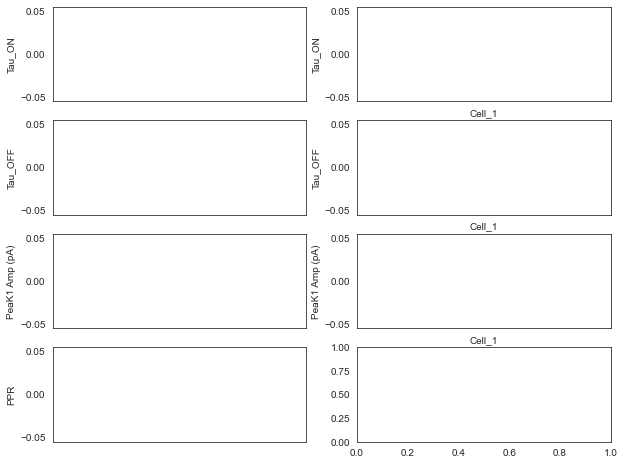

In [272]:
#%%  eIPSC kineticsTau_ON, Tau_OFF, Amplitude, PPR

f, axes = plt.subplots(4, 2, figsize=(10,8))
ax= sns.boxplot(palette=['#BBBBBB','#DDDDDD'],linewidth=2, y='Tau_ON', data= IPSC_kinetics, width=0.3, ax=axes[0,0])
medians = round(IPSC_kinetics['Tau_ON'].median(),3)
vertical_offset = IPSC_kinetics['Tau_ON'].median() * 0.5 # offset from median for display
ax.text(0.2,medians ,medians, 
horizontalalignment='center',fontsize=15,color='k',weight='semibold')

ax=sns.swarmplot(y='Tau_ON', data= IPSC_kinetics, 
                  palette=sns.color_palette(),
                  edgecolor='black',
                  linewidth=0.1,
                  ax=axes[0,0])
ax=sns.barplot(palette=['#BBBBBB','#DDDDDD'],linewidth=2, x='Cell', y='Tau_ON', data= IPSC_kinetics, ax=axes[0,1])
ax=sns.swarmplot(x='Cell', y='Tau_ON', data= IPSC_kinetics, 
                  palette=sns.color_palette(),
                  edgecolor='black',
                  linewidth=0.1,
                  ax=axes[0,1])
# ax.set(ylim=(-20, 0))





ax= sns.boxplot(palette=['#BBBBBB','#DDDDDD'],linewidth=2, y='Tau_OFF', data= IPSC_kinetics, width=0.3, ax=axes[1,0])
medians = round(IPSC_kinetics['Tau_OFF'].median(),3)
vertical_offset = IPSC_kinetics['Tau_OFF'].median() * 0.5 # offset from median for display
ax.text(0.2,medians ,medians, 
horizontalalignment='center',fontsize=15,color='k',weight='semibold')

ax=sns.swarmplot(y='Tau_OFF', data= IPSC_kinetics, 
                  palette=sns.color_palette(),
                  edgecolor='black',
                  linewidth=0.1,
                  ax=axes[1,0])
ax=sns.barplot(palette=['#BBBBBB','#DDDDDD'],linewidth=2, x='Cell', y='Tau_OFF', data= IPSC_kinetics, ax=axes[1,1])
ax=sns.swarmplot(x='Cell', y='Tau_OFF', data= IPSC_kinetics, 
                  palette=sns.color_palette(),
                  edgecolor='black',
                  linewidth=0.1,
                  ax=axes[1,1])
# ax.set(ylim=(-40, 0))





ax= sns.boxplot(palette=['#BBBBBB','#DDDDDD'],linewidth=2, y='PeaK1 Amp (pA)', data= IPSC_kinetics, width=0.3, ax=axes[2,0])
medians = round(IPSC_kinetics['PeaK1 Amp (pA)'].median(),3)
vertical_offset = IPSC_kinetics['PeaK1 Amp (pA)'].median() * 0.5 # offset from median for display
ax.text(0.2,medians ,medians, 
horizontalalignment='center',fontsize=15,color='k',weight='semibold')

ax=sns.swarmplot(y='PeaK1 Amp (pA)', data= IPSC_kinetics, 
                  palette=sns.color_palette(),
                  edgecolor='black',
                  linewidth=0.1,
                  ax=axes[2,0])
ax=sns.barplot(palette=['#BBBBBB','#DDDDDD'],linewidth=2, x='Cell', y='PeaK1 Amp (pA)',  data= IPSC_kinetics, ax=axes[2,1])
ax=sns.swarmplot(x='Cell', y='PeaK1 Amp (pA)', data= IPSC_kinetics, 
                  palette=sns.color_palette(),
                  edgecolor='black',
                  linewidth=0.1,
                  ax=axes[2,1])
# ax.set(ylim=(-40, 0))





ax= sns.boxplot(palette=['#BBBBBB','#DDDDDD'],linewidth=2, y='PPR', data= IPSC_kinetics, width=0.3, ax=axes[3,0])
medians = round(IPSC_kinetics['PPR'].median(),3)
vertical_offset = IPSC_kinetics['PPR'].median() * 0.5 # offset from median for display
ax.text(0.2,medians ,medians, 
horizontalalignment='center',fontsize=15,color='k',weight='semibold')

ax= sns.swarmplot(y='PPR', data= IPSC_kinetics, 
                  palette=sns.color_palette(),
                  edgecolor='black',
                  linewidth=0.1,
                  ax=axes[3,0])
# ax.set(ylim=(-40, 0))


ax=sns.barplot(palette=['#BBBBBB','#DDDDDD'],linewidth=3, x='Cell', y='PeaK Amp (pA)', hue='Peak', data= IPSC_kinetics, ax=axes[3,1])

ax=sns.swarmplot(x='Cell', y='PeaK Amp (pA)', hue='Peak', data= IPSC_kinetics, 
                  palette=sns.color_palette(),
                  edgecolor='black',
                  linewidth=0.5,
                  size = 4, dodge=True, ax=axes[3,1])

# Now connect the dots
# Find idx0 and idx1 by inspecting the elements return from ax.get_children()
# ... or find a way to automate it
for ii in range(0, 10, 2):
    idx0 = ii
    idx1 = ii+1
    locs1 = ax.get_children()[idx0].get_offsets()
    locs2 = ax.get_children()[idx1].get_offsets()

    for i in range(locs1.shape[0]):
        x = [locs1[i, 0], locs2[i, 0]]
        y = [locs1[i, 1], locs2[i, 1]]
        ax.plot(x, y, color='black', alpha=0.4)
# ax.set(ylim=(-40, 0))



plt.suptitle('eIPSC Kinetics')
plt.subplots_adjust(top=0.2)

f.tight_layout()
sns.despine(trim=True)

# plt.savefig('IPSC_kinetics.svg')
# plt.savefig('IPSC_kinetics.pdf')


In [223]:
# import plotly.figure_factory as ff
# import numpy as np

# # Add histogram data

# x1 =  [x for x in EPSC_kinetics['Turning_point (ms)'] if str(x) != 'nan']
# x2 = [x for x in IPSC_kinetics['Turning_point (ms)'] if str(x) != 'nan']

# # Group data together
# hist_data = [x1, x2]

# group_labels = ['eEPSC','eIPSC']

# # Create distplot with custom bin_size

# fig = ff.create_distplot(hist_data, group_labels, bin_size=0.4)
# fig.update_layout(
# #         title = 'Proper Motion Histogram + Gaussian distribution ',
#         xaxis = dict(
#             title='Turning point (ms)'
#         ),
#         yaxis = dict(
#             title='Density'
#         ),
# #         template = 'plotly_dark',
#         showlegend = True,
#      width=700, height=700)
# fig.show()

In [279]:
import plotly.graph_objects as go

labels = ['Responsive Cells %d' %5,'Noresponsive Cells %d' %2]
values = [5, 2]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.2, 0])])
fig.show()
fig.write_image(os.path.join(save_path , 'Response_Pie.svg'))
fig.write_image(os.path.join(save_path , 'Response_Pie.pdf'))

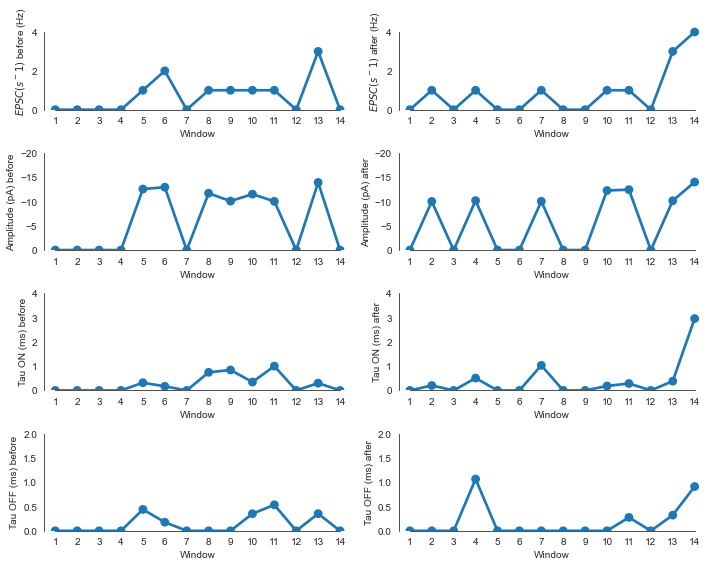

In [355]:
## Dynamics of eEPSC
f, axes = plt.subplots(4, 3, figsize=(10,8))
data = pd.read_excel('Overal_dynamics.xlsx', sheet_name='EPSC')

# EPSC RATE
ax = sns.pointplot(x="Window", y="freq_rates_before (Hz)", data=data, ax=axes[0,0])
ax.set(ylim=(0, 10))
ax.set(ylabel='$EPSC(s^-1)$ before (Hz)')
ax = sns.pointplot(x="Window", y="freq_rates_after (Hz)", data=data, ax=axes[0,1])
ax.set(ylim=(0, 10))
ax.set(ylabel='$EPSC(s^-1)$ after (Hz)')

############ comparison
all_mean_b =data.pivot('Cell', 'Window', 'freq_rates_before (Hz)') 
all_last_b = all_mean_b[14] # last window

all_mean_a =data.pivot('Cell', 'Window', 'freq_rates_after (Hz)')
all_first_a = all_mean_a[1] # first window
# Generate random data
set1 = all_last_b.tolist()
set2 = all_first_a.tolist()

# Put into dataframe
df = pd.DataFrame({'1s Bfr': set1, '1s Aftr': set2})
dataa = pd.melt(df)

# Plot
# fig, ax = plt.subplots()
ax = sns.swarmplot(data=dataa, x='variable', y='value', ax=axes[0,2])

# Now connect the dots
# Find idx0 and idx1 by inspecting the elements return from ax.get_children()
# ... or find a way to automate it
idx0 = 0
idx1 = 1
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [set1[i], set2[i]]
    ax.plot(x, y, color='black', alpha=0.3)
    
add_stat_annotation(data=dataa, x='variable', y='value', ax=axes[0,2], 
                    box_pairs=[('1s Bfr', '1s Aftr')
                                ],
                    test='Wilcoxon', text_format='star', loc='inside', verbose=2)   
    

    
    

##__________________________________________________________________________________
# EPSC AMPLITUDE
ax = sns.pointplot(x="Window", y="amp_before (pA)", data=data, ax=axes[1,0])
ax.set(ylim=(0, -60))
ax.set(ylabel='Amplitude (pA) before')
ax = sns.pointplot(x="Window", y="amp_after (pA)", data=data, ax=axes[1,1])
ax.set(ylim=(0, -60))
ax.set(ylabel='Amplitude (pA) after')

############ comparison
all_mean_b =data.pivot('Cell', 'Window', 'amp_before (pA)') 
all_last_b = all_mean_b[14] # last window

all_mean_a =data.pivot('Cell', 'Window', 'amp_after (pA)')
all_first_a = all_mean_a[1] # first window
# Generate random data
set1 = all_last_b.tolist()
set2 = all_first_a.tolist()

# Put into dataframe
df = pd.DataFrame({'1s Bfr': set1, '1s Aftr': set2})
dataa = pd.melt(df)

# Plot
# fig, ax = plt.subplots()
ax = sns.swarmplot(data=dataa, x='variable', y='value', ax=axes[1,2])

# Now connect the dots
# Find idx0 and idx1 by inspecting the elements return from ax.get_children()
# ... or find a way to automate it
idx0 = 0
idx1 = 1
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [set1[i], set2[i]]
    ax.plot(x, y, color='black', alpha=0.3)
    
add_stat_annotation(data=dataa, x='variable', y='value', ax=axes[1,2], 
                    box_pairs=[('1s Bfr', '1s Aftr')
                                ],
                    test='Wilcoxon', text_format='star', loc='inside', verbose=2)   
    

    
    

##__________________________________________________________________________________


# EPSC Tau_On
ax = sns.pointplot(x="Window", y="tauON_before (ms)", data=data, ax=axes[2,0])
ax.set(ylim=(0, 4))
ax.set(ylabel='Tau ON (ms) before')
ax = sns.pointplot(x="Window", y="tauON_after (ms)", data=data, ax=axes[2,1])
ax.set(ylim=(0, 4))
ax.set(ylabel='Tau ON (ms) after')


############ comparison
all_mean_b =data.pivot('Cell', 'Window', 'tauON_before (ms)') 
all_last_b = all_mean_b[14] # last window

all_mean_a =data.pivot('Cell', 'Window', 'tauON_after (ms)')
all_first_a = all_mean_a[1] # first window
# Generate random data
set1 = all_last_b.tolist()
set2 = all_first_a.tolist()

# Put into dataframe
df = pd.DataFrame({'1s Bfr': set1, '1s Aftr': set2})
dataa = pd.melt(df)

# Plot
# fig, ax = plt.subplots()
ax = sns.swarmplot(data=dataa, x='variable', y='value', ax=axes[2,2])

# Now connect the dots
# Find idx0 and idx1 by inspecting the elements return from ax.get_children()
# ... or find a way to automate it
idx0 = 0
idx1 = 1
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [set1[i], set2[i]]
    ax.plot(x, y, color='black', alpha=0.3)
    
add_stat_annotation(data=dataa, x='variable', y='value', ax=axes[2,2], 
                    box_pairs=[('1s Bfr', '1s Aftr')
                                ],
                    test='Wilcoxon', text_format='star', loc='inside', verbose=2)      

##__________________________________________________________________________________


# EPSC Tau_OFF
ax = sns.pointplot(x="Window", y="tauOFF_before (ms)", data=data, ax=axes[3,0])
ax.set(ylim=(0, 12))
ax.set(ylabel='Tau OFF (ms) before')
ax = sns.pointplot(x="Window", y="tauOFF_after (ms)", data=data, ax=axes[3,1])
ax.set(ylim=(0, 12))
ax.set(ylabel='Tau OFF (ms) after')
############ comparison
all_mean_b =data.pivot('Cell', 'Window', 'tauOFF_before (ms)') 
all_last_b = all_mean_b[14] # last window

all_mean_a =data.pivot('Cell', 'Window', 'tauOFF_after (ms)')
all_first_a = all_mean_a[1] # first window
# Generate random data
set1 = all_last_b.tolist()
set2 = all_first_a.tolist()

# Put into dataframe
df = pd.DataFrame({'1s Bfr': set1, '1s Aftr': set2})
dataa = pd.melt(df)

# Plot
# fig, ax = plt.subplots()
ax = sns.swarmplot(data=dataa, x='variable', y='value', ax=axes[3,2])

# Now connect the dots
# Find idx0 and idx1 by inspecting the elements return from ax.get_children()
# ... or find a way to automate it
idx0 = 0
idx1 = 1
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [set1[i], set2[i]]
    ax.plot(x, y, color='black', alpha=0.3)
    
add_stat_annotation(data=dataa, x='variable', y='value', ax=axes[3,2], 
                    box_pairs=[('1s Bfr', '1s Aftr')
                                ],
                    test='Wilcoxon', text_format='star', loc='inside', verbose=2)      

##__________________________________________________________________________________

f.tight_layout()
sns.despine(trim=True)

f.savefig(os.path.join(save_path , 'Dynamics.svg'))
f.savefig(os.path.join(save_path , 'Dynamics.pdf'))